# Step-by-Step Guideline for Running MTCNN on FaceScrub Datase

### Import Necessary Library

In [3]:

from mtcnn import MTCNN
import tensorflow as tf
from imutils import paths

from tqdm import tqdm
import cv2
import os

### Configure GPU (if available) 

In [4]:
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
config = tf.compat.v1.ConfigProto()

config.gpu_options.allow_growth = True

session = tf.compat.v1.Session(config=config)

###  Initialize MTCNN Detector

In [5]:
detector = MTCNN()

###  Load Image Paths

In [10]:
dirpath="facescrub_dataset_samples/"
imagePaths = sorted(list(paths.list_images(dirpath)))

### Processes Each Images

In [11]:
for imagePath in tqdm(imagePaths):
    path_split = imagePath.split(os.sep)
    name_actor = path_split[-2]
    fn = path_split[-1]
    fn = fn.split('.')
    filename = fn[0]
    fileformat = fn[1]
    
    dirdest = "new_mtcnn/training/" + name_actor + "/"
    
    if not os.path.exists(dirdest):
        os.makedirs(dirdest)
    
    image = cv2.cvtColor(cv2.imread(imagePath), cv2.COLOR_BGR2RGB)
    result = detector.detect_faces(image)
    for i in range(len(result)):
        bounding_box = result[i]['box']
        keypoints = result[i]['keypoints']
        bounding_box[0] = 0 if bounding_box[0] < 0 else bounding_box[0]
        bounding_box[1] = 0 if bounding_box[1] < 0 else bounding_box[1]
        path_save = dirdest + filename + "." + fileformat
        img = image[bounding_box[1]:bounding_box[1] + bounding_box[3], \
        bounding_box[0]:bounding_box[0] + bounding_box[2]]
        cv2.imwrite(path_save, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

100%|██████████| 48/48 [00:17<00:00,  2.82it/s]


### Verify the Output

'Aaron_Eckhart'

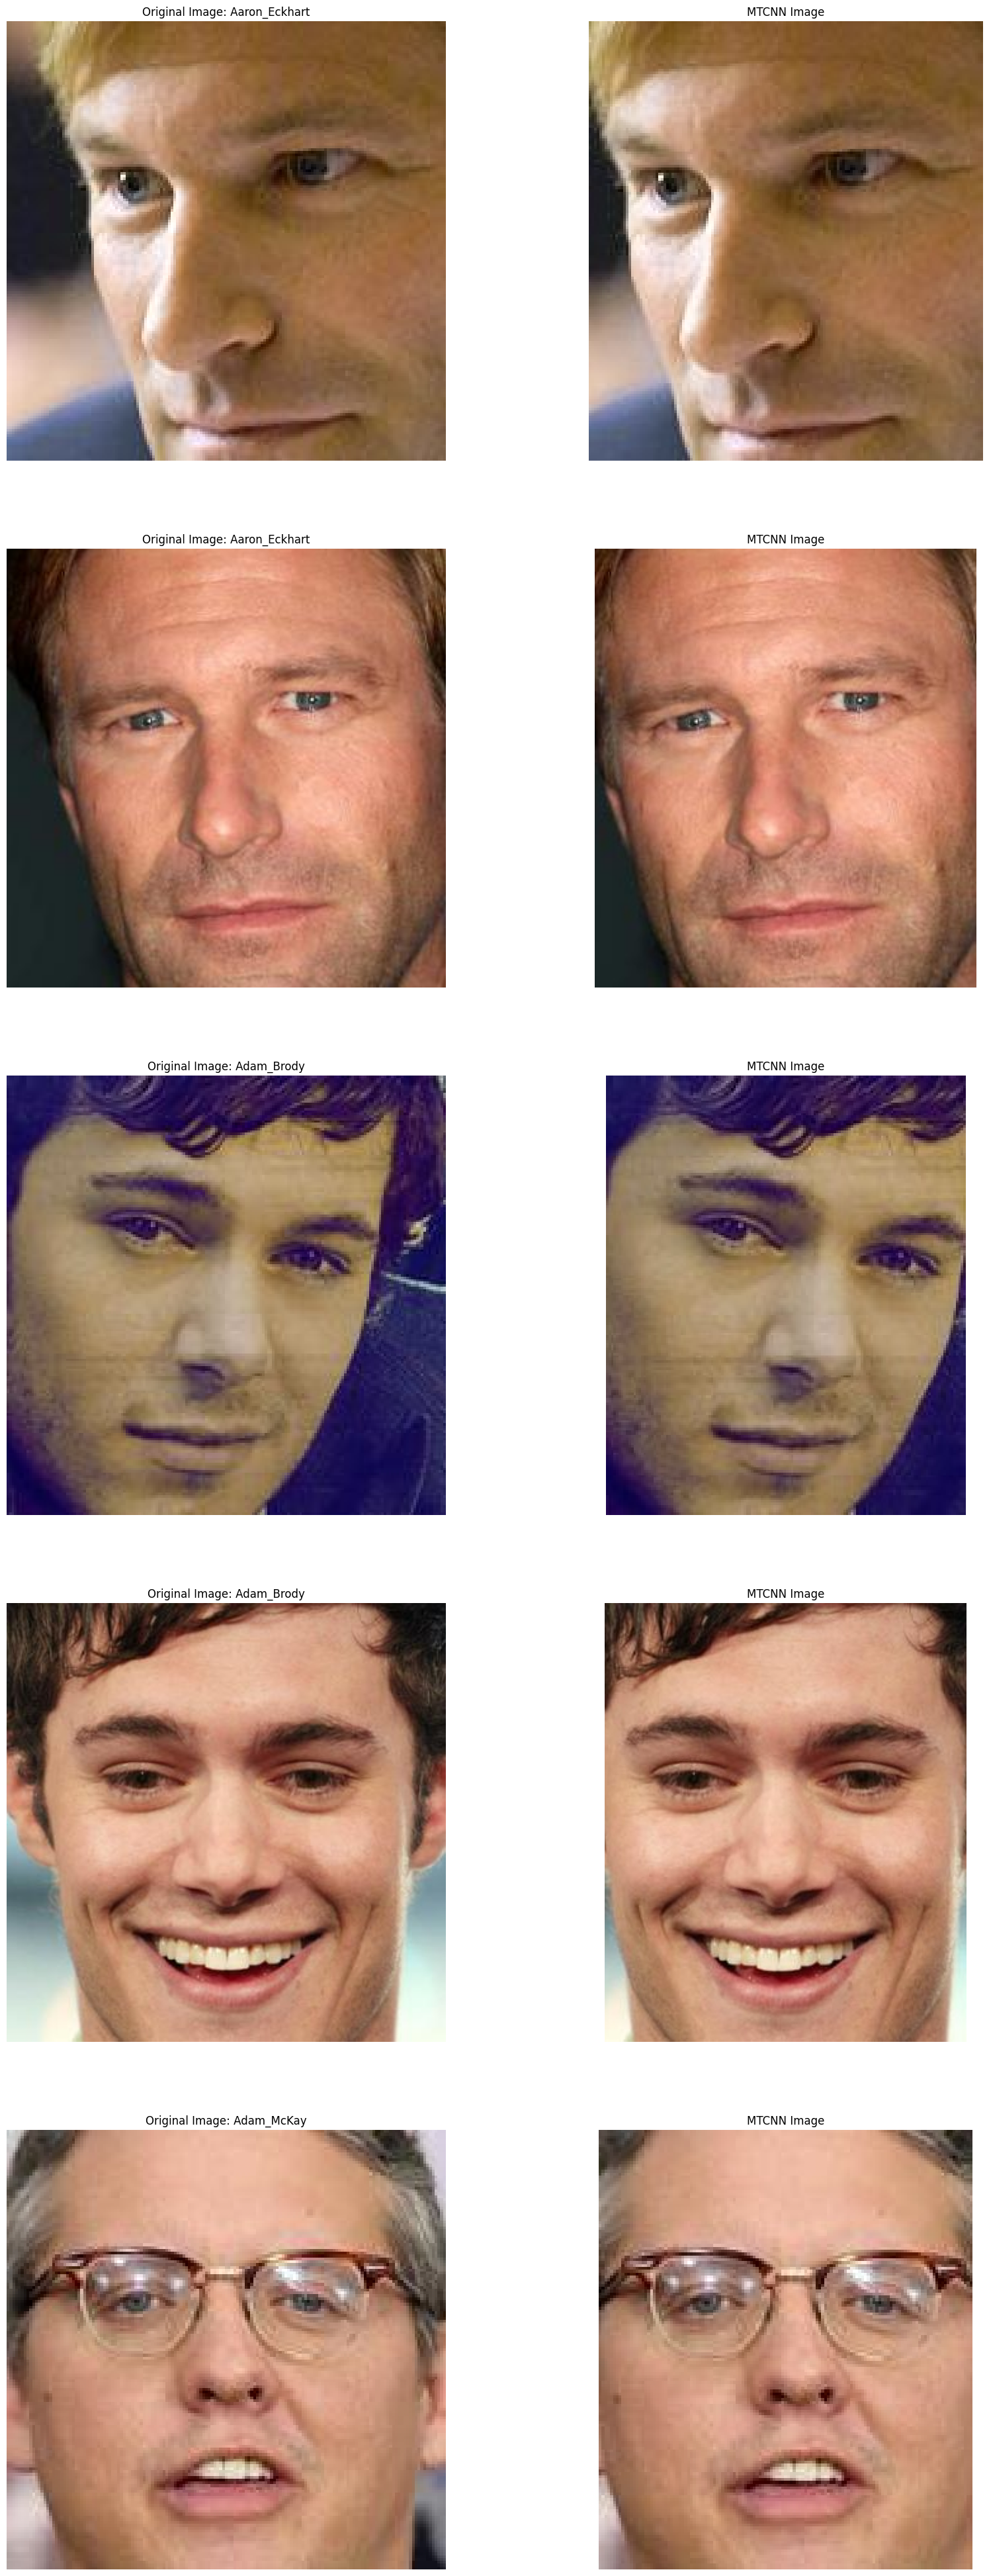

In [23]:
import cv2
import matplotlib.pyplot as plt

facescrub_folder = "facescrub_dataset_samples/"
mtcnn_folder = "new_mtcnn/training/"

dir =os.listdir(mtcnn_folder)

list_all_file=[]

for folder in dir:
    subfolder=os.listdir(mtcnn_folder+folder)
    for file in subfolder:
        list_all_file.append(folder+"/"+file)




fig,ax=plt.subplots(5,2,figsize=(20,50))

num=[5,10,15,20,25]
for i in range(5):
    ax[i,0].imshow(cv2.cvtColor(cv2.imread(facescrub_folder+list_all_file[num[i]]), cv2.COLOR_BGR2RGB))
    ax[i,1].imshow(cv2.cvtColor(cv2.imread(mtcnn_folder+list_all_file[num[i]]), cv2.COLOR_BGR2RGB))
    ax[i,0].axis('off')
    ax[i,1].axis('off')
    ax[i,0].set_title("Original Image: "+list_all_file[num[i]].split('/')[0])
    ax[i,1].set_title("MTCNN Image")
   

